In [1]:

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

# Set the directory to the local input folder, e.g., "./input"
input_dir = '/Users/iamprincekumar/Documents/minorproject/'  # Change this path to your local directory

# List all files under the input directory
for dirname, _, filenames in os.walk(input_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/var/folders/s3/9hjknsq16vj93lr_ry_j7d_c0000gn/T/ipykernel_24718/108081883.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


/Users/iamprincekumar/Documents/minorproject/.DS_Store
/Users/iamprincekumar/Documents/minorproject/cnn-only.ipynb
/Users/iamprincekumar/Documents/minorproject/deepfake-faces/.DS_Store
/Users/iamprincekumar/Documents/minorproject/deepfake-faces/metadata.csv
/Users/iamprincekumar/Documents/minorproject/deepfake-faces/faces_224/lnbgouvgjz.jpg
/Users/iamprincekumar/Documents/minorproject/deepfake-faces/faces_224/reesbefvpz.jpg
/Users/iamprincekumar/Documents/minorproject/deepfake-faces/faces_224/vrqfktvxjm.jpg
/Users/iamprincekumar/Documents/minorproject/deepfake-faces/faces_224/ztragcjjww.jpg
/Users/iamprincekumar/Documents/minorproject/deepfake-faces/faces_224/ablxzjygfz.jpg
/Users/iamprincekumar/Documents/minorproject/deepfake-faces/faces_224/wltycinaot.jpg
/Users/iamprincekumar/Documents/minorproject/deepfake-faces/faces_224/hgvtnzfcvs.jpg
/Users/iamprincekumar/Documents/minorproject/deepfake-faces/faces_224/bbbkqdlsyu.jpg
/Users/iamprincekumar/Documents/minorproject/deepfake-faces/fa

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [2]:
dataset_path = '/Users/iamprincekumar/Documents/minorproject/deepfake-faces/metadata.csv'

In [3]:
df = pd.read_csv(dataset_path)

In [4]:
df.head()

videoname  original_width  original_height label        original
0  aznyksihgl.mp4             129              129  FAKE  xnojggkrxt.mp4
1  gkwmalrvcj.mp4             129              129  FAKE  hqqmtxvbjj.mp4
2  lxnqzocgaq.mp4             223              217  FAKE  xjzkfqddyk.mp4
3  itsbtrrelv.mp4             186              186  FAKE  kqvepwqxfe.mp4
4  ddvgrczjno.mp4             155              155  FAKE  pluadmqqta.mp4

In [5]:
df.tail()

videoname  original_width  original_height label        original
95629  rqcsjlsmiz.mp4             129              129  FAKE  pbsccacgff.mp4
95630  xjmnerypjf.mp4              90               90  FAKE  qrjydgidga.mp4
95631  hnewpzhihy.mp4              75               75  FAKE  vabhbfiifl.mp4
95632  okbarlnmwm.mp4             268              267  FAKE  uqaaspbgtz.mp4
95633  asddammewq.mp4              90               90  FAKE  yfjkgiynbi.mp4

In [6]:
# the number of datasets present
df.shape

(95634, 5)

In [7]:
df.columns

Index(['videoname', 'original_width', 'original_height', 'label', 'original'], dtype='object')

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

videoname              0
original_width         0
original_height        0
label                  0
original           16293
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95634 entries, 0 to 95633
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   videoname        95634 non-null  object
 1   original_width   95634 non-null  int64 
 2   original_height  95634 non-null  int64 
 3   label            95634 non-null  object
 4   original         79341 non-null  object
dtypes: int64(2), object(3)
memory usage: 3.6+ MB


In [11]:
df.nunique()

videoname          95634
original_width        31
original_height       34
label                  2
original           16955
dtype: int64

In [12]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index(['videoname', 'label', 'original'], dtype='object')

Numerical type columns:
Index(['original_width', 'original_height'], dtype='object')


In [13]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 10:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [14]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [15]:
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: ['label']
Non-Categorical Features: ['videoname', 'original']
Discrete Features: []
Continuous Features: ['original_width', 'original_height']


In [16]:
df = df.fillna("Not Available")

In [17]:
for i in categorical:
    print(i,':', df[i].unique())
    print()

label : ['FAKE' 'REAL']



In [18]:
for i in categorical:
    print(df[i].value_counts())
    print()

label
FAKE    79341
REAL    16293
Name: count, dtype: int64



In [19]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
import warnings
warnings.filterwarnings('ignore')

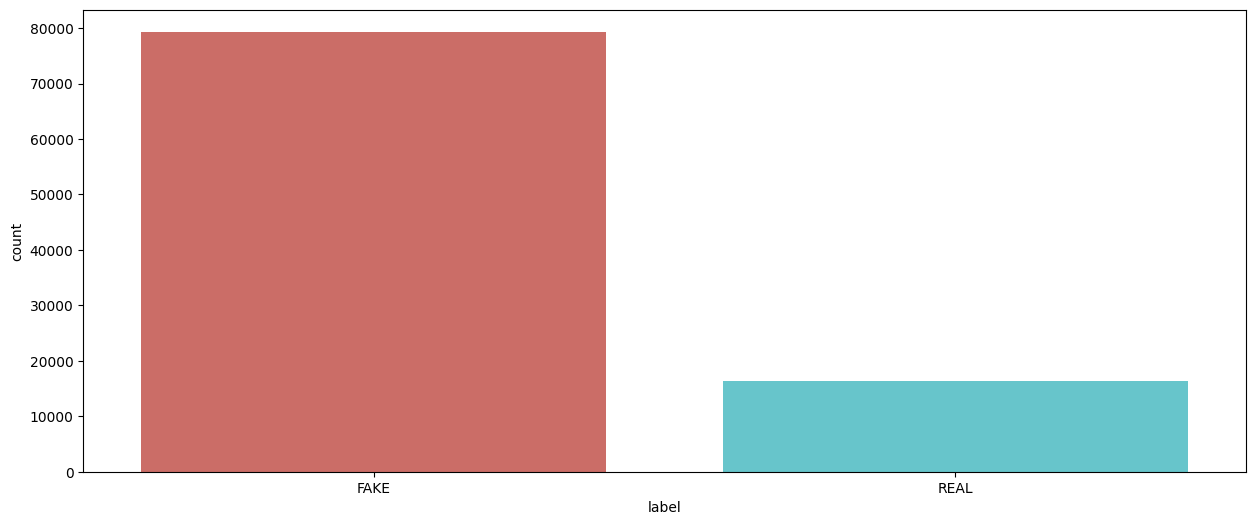

In [21]:
for i in categorical:
    plt.figure(figsize=(15,6))
    sns.countplot(x = df[i], data = df, palette = 'hls')
    plt.show()

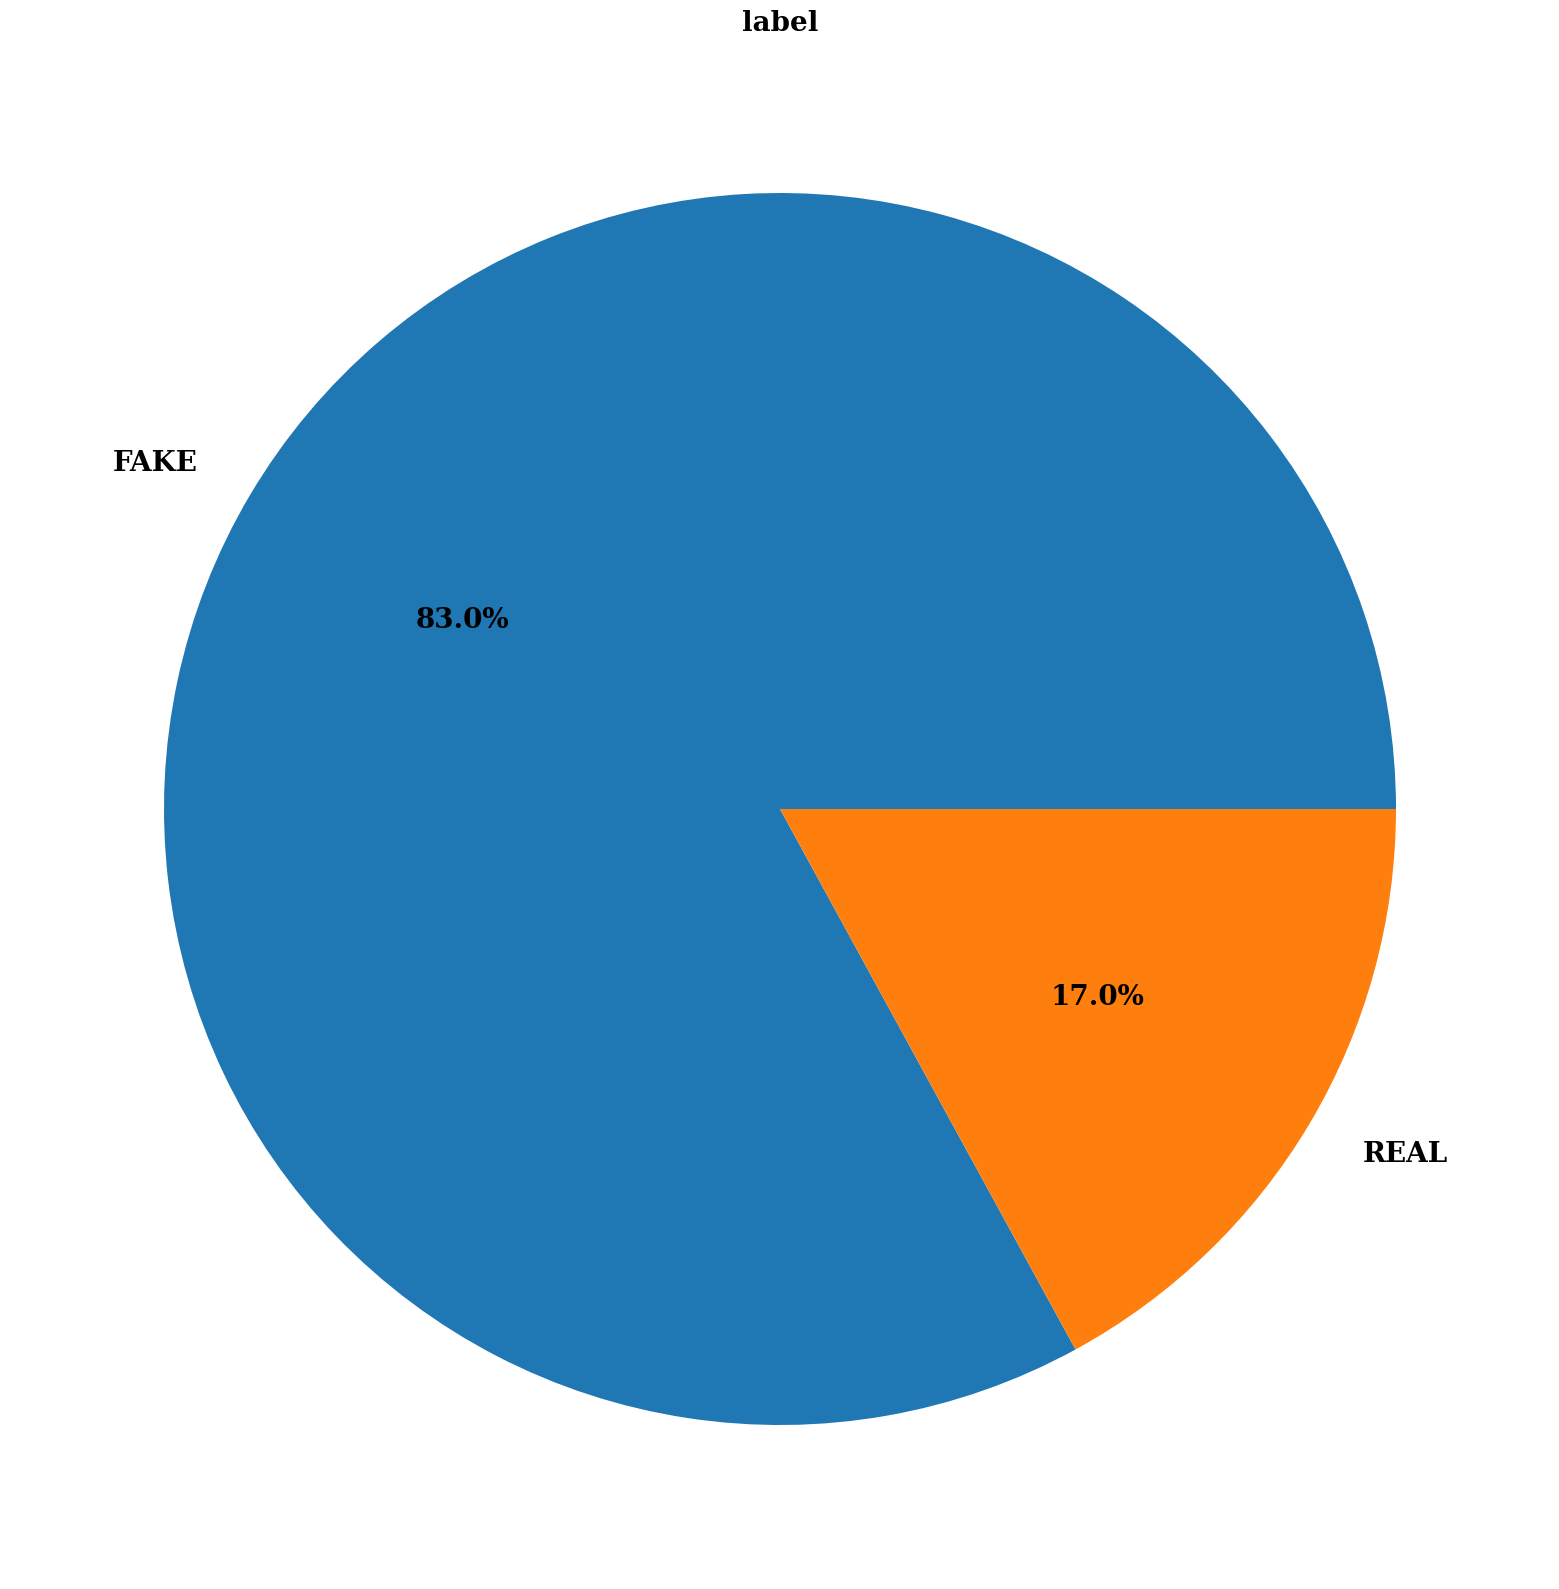

In [22]:
for i in categorical:
    plt.figure(figsize=(30,20)) 
    plt.pie(df[i].value_counts(), labels=df[i].value_counts().index, 
            autopct='%1.1f%%', textprops={ 'fontsize': 20,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' }) 
    hfont = {'fontname':'serif', 'weight': 'bold'}
    plt.title(i, size=20, **hfont) 
    plt.show()

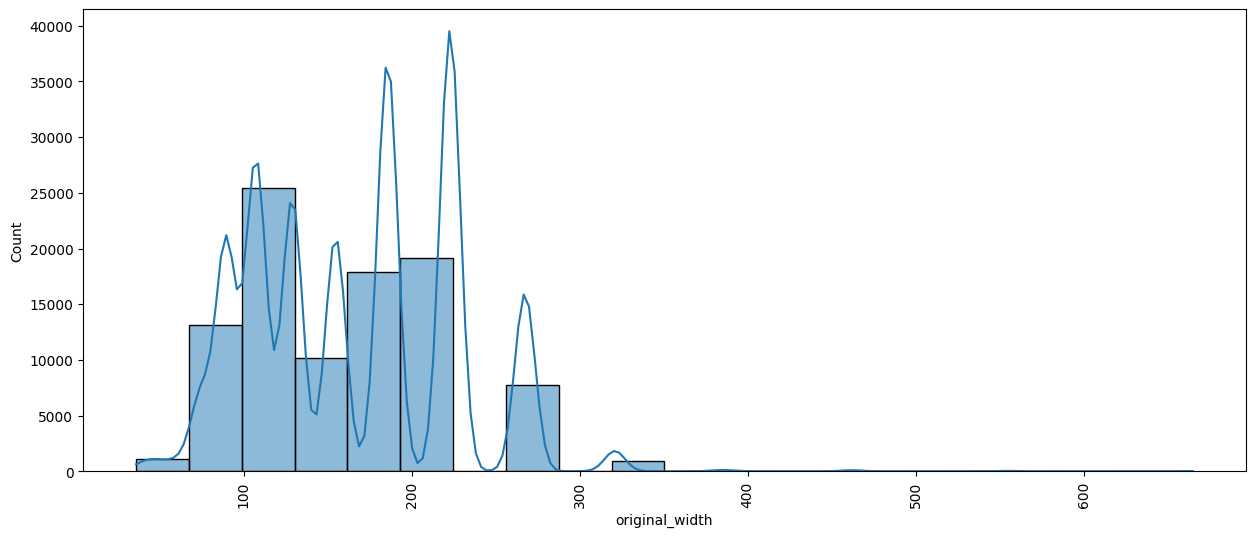

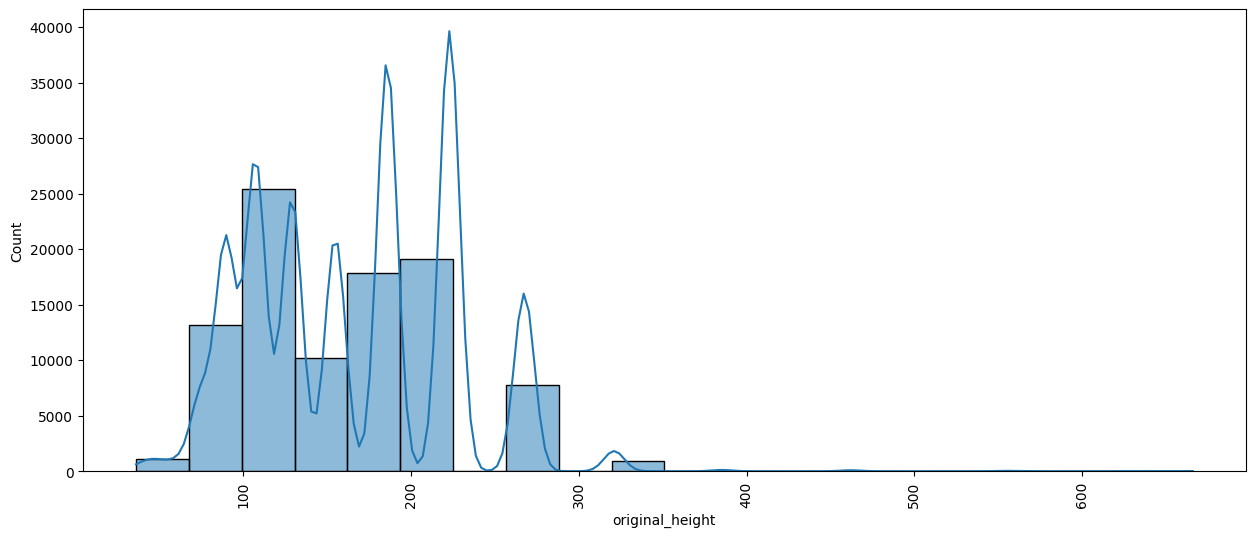

In [23]:
for i in numerical_columns:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], kde = True, bins = 20, palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

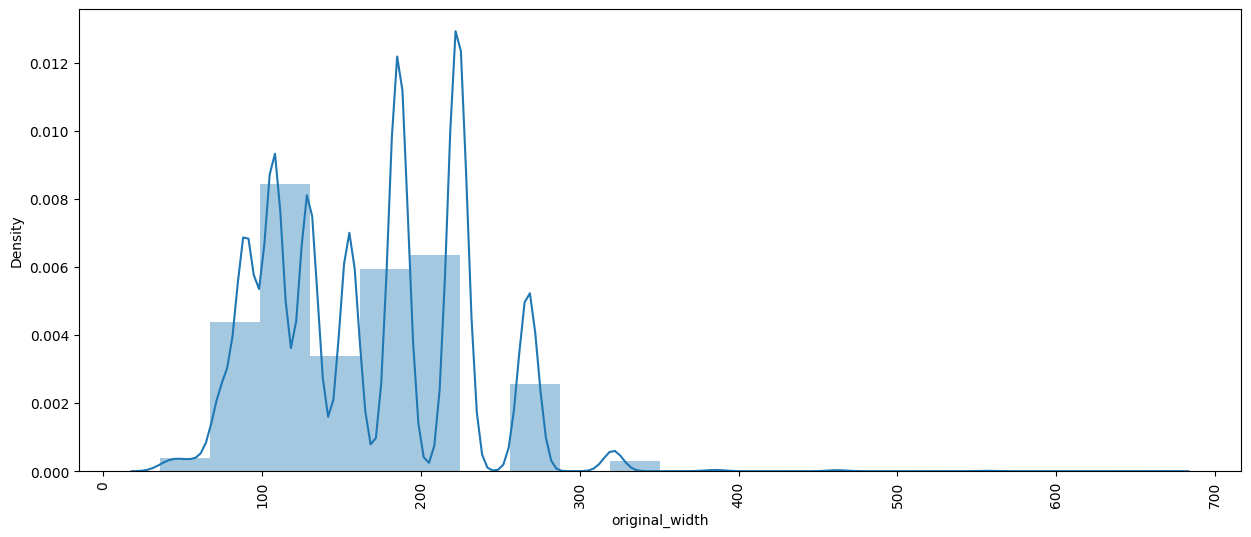

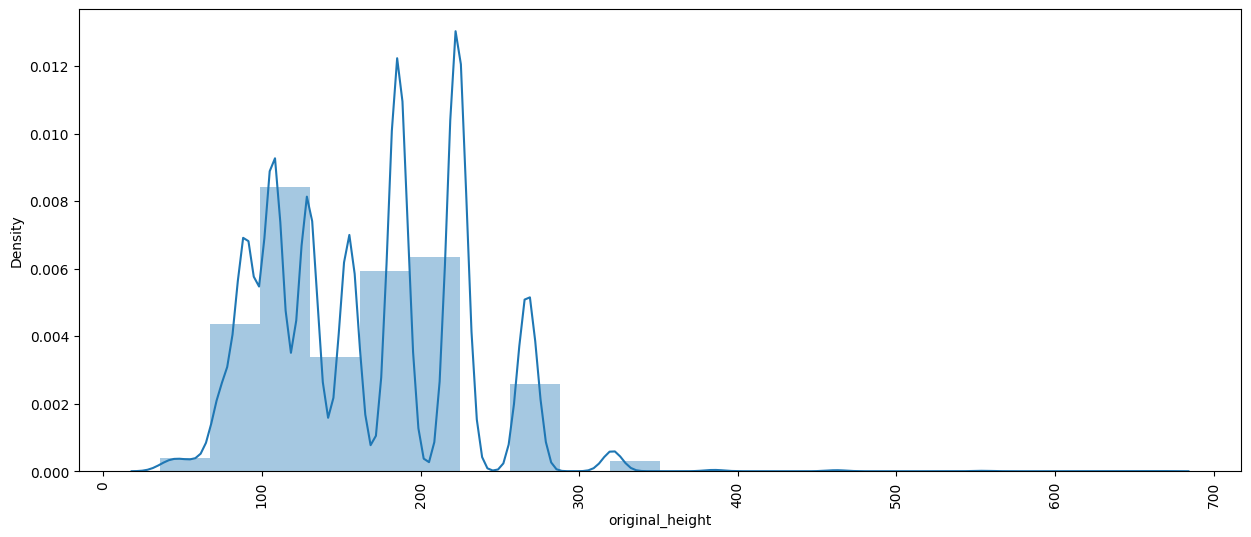

In [24]:
for i in numerical_columns:
    plt.figure(figsize=(15,6))
    sns.distplot(df[i], kde = True, bins = 20)
    plt.xticks(rotation = 90)
    plt.show()

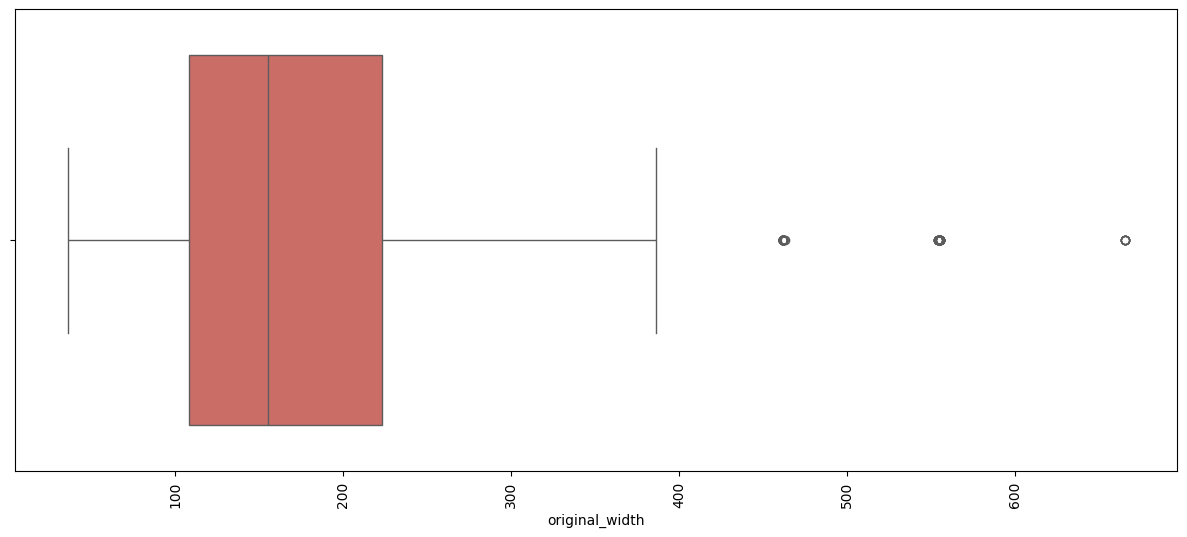

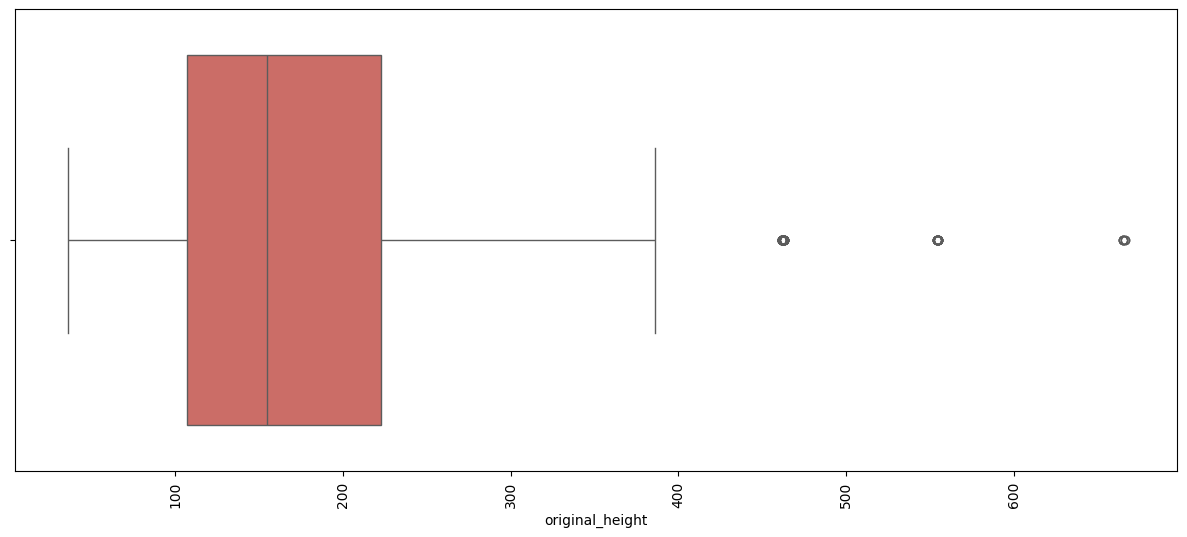

In [25]:
for i in numerical_columns:
    plt.figure(figsize=(15,6))
    sns.boxplot(x = df[i],data = df, palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

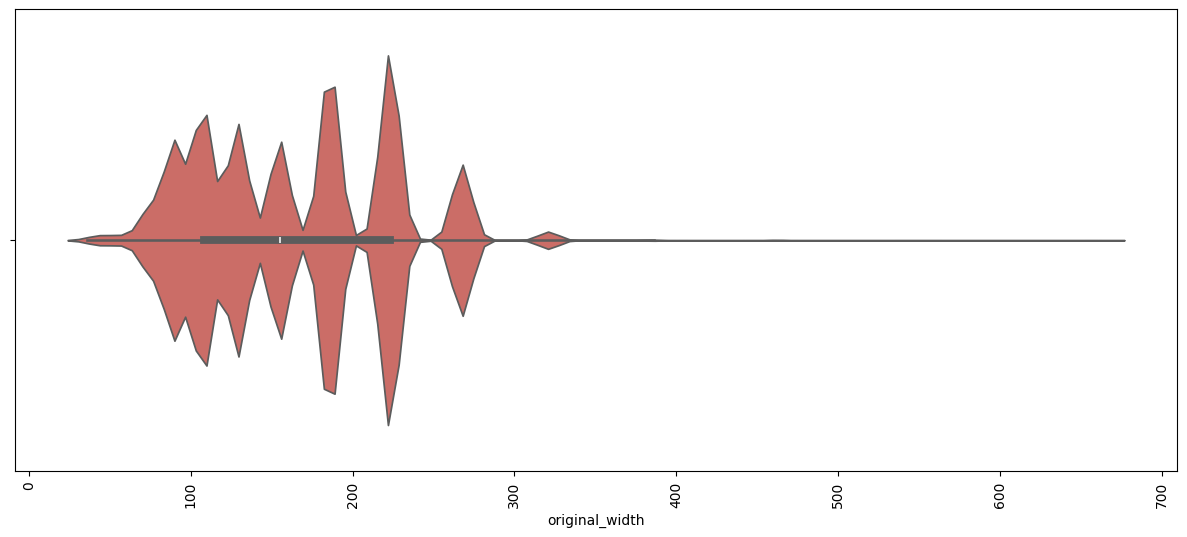

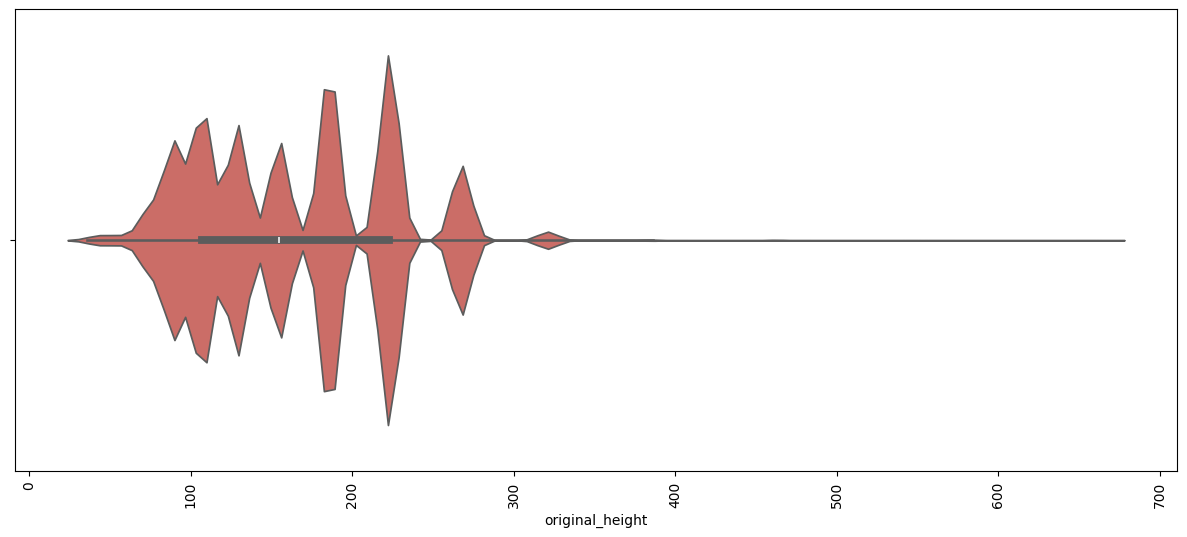

In [26]:
for i in numerical_columns:
    plt.figure(figsize=(15,6))
    sns.violinplot(x = df[i],data = df, palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

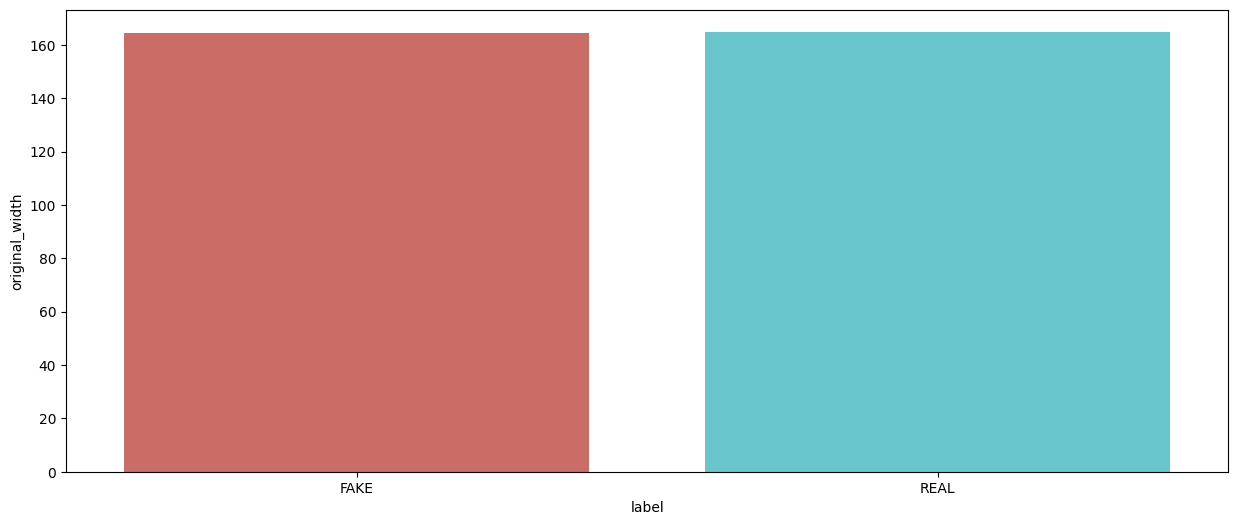

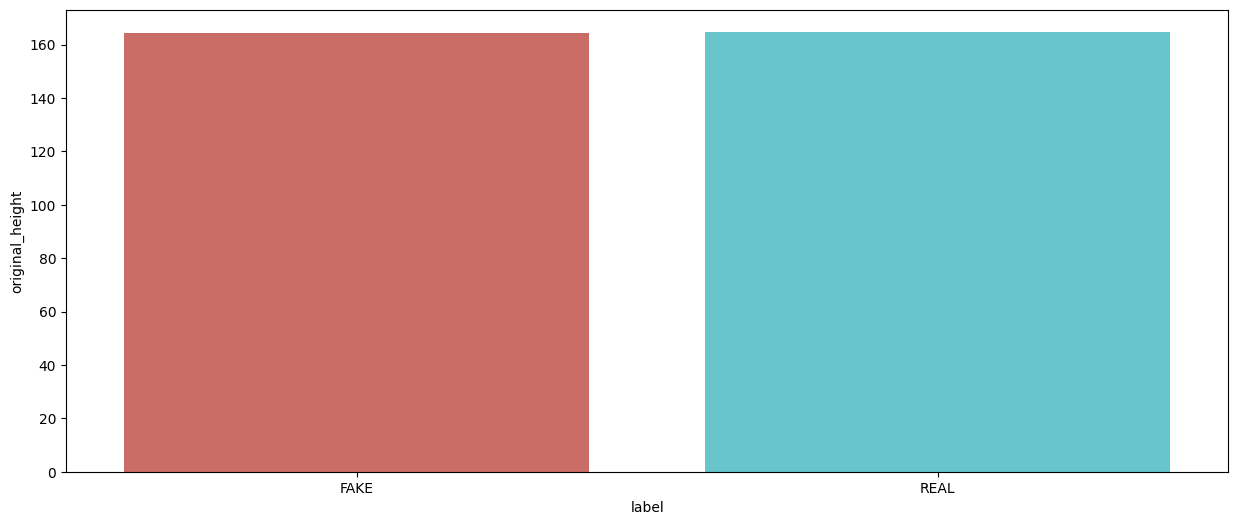

In [27]:
for i in categorical:
    for j in numerical_columns:
        plt.figure(figsize=(15,6))
        sns.barplot(x = df[i], y = df[j], data = df, ci = None, palette = 'hls')
        plt.show()

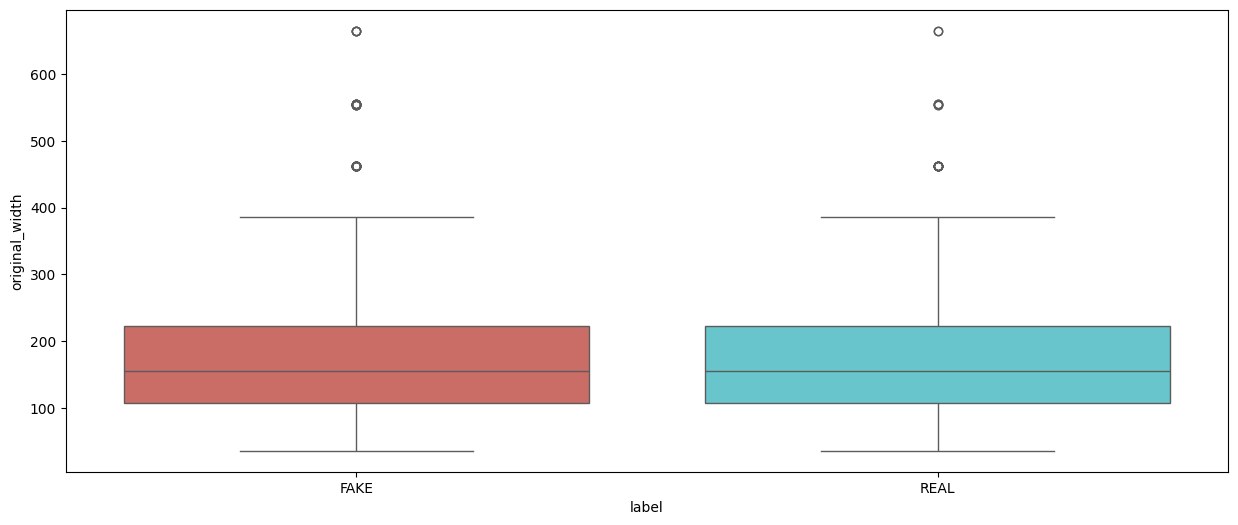

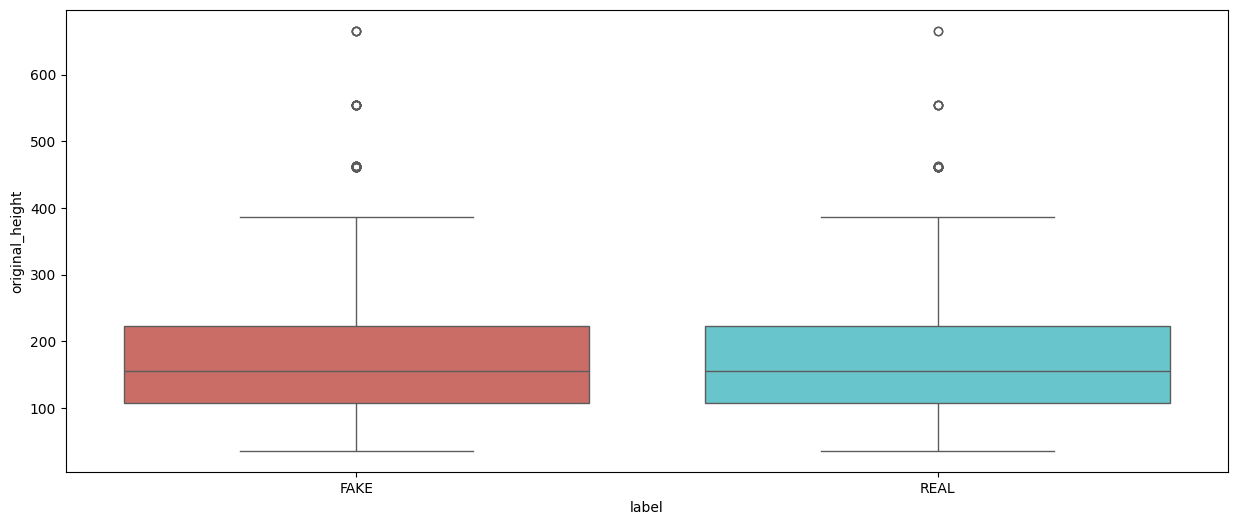

In [28]:
for i in categorical:
    for j in numerical_columns:
        plt.figure(figsize=(15,6))
        sns.boxplot(x = df[i], y = df[j], data = df, palette = 'hls')
        plt.show()

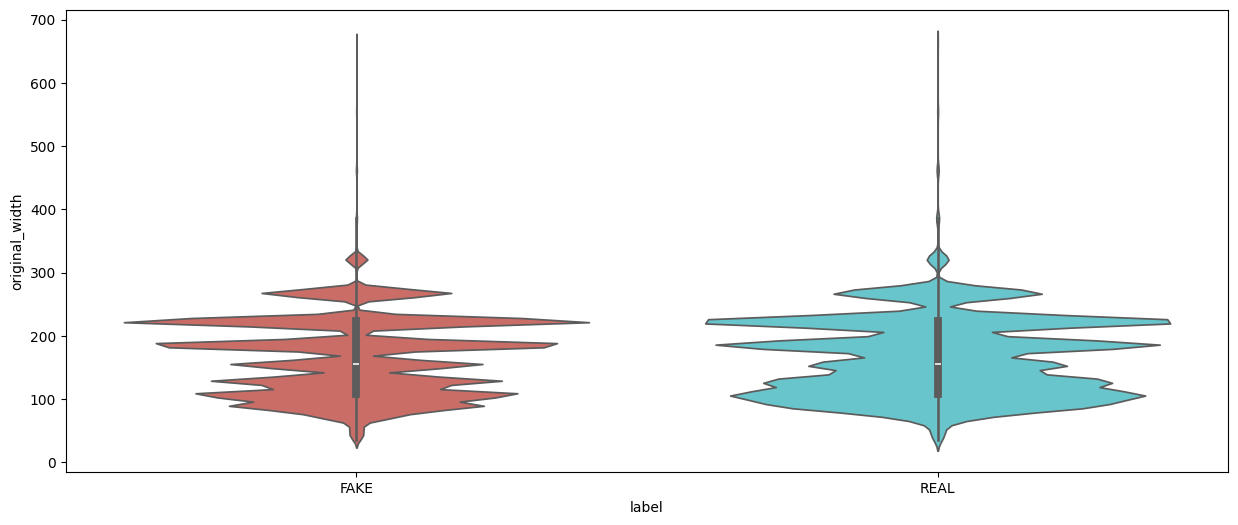

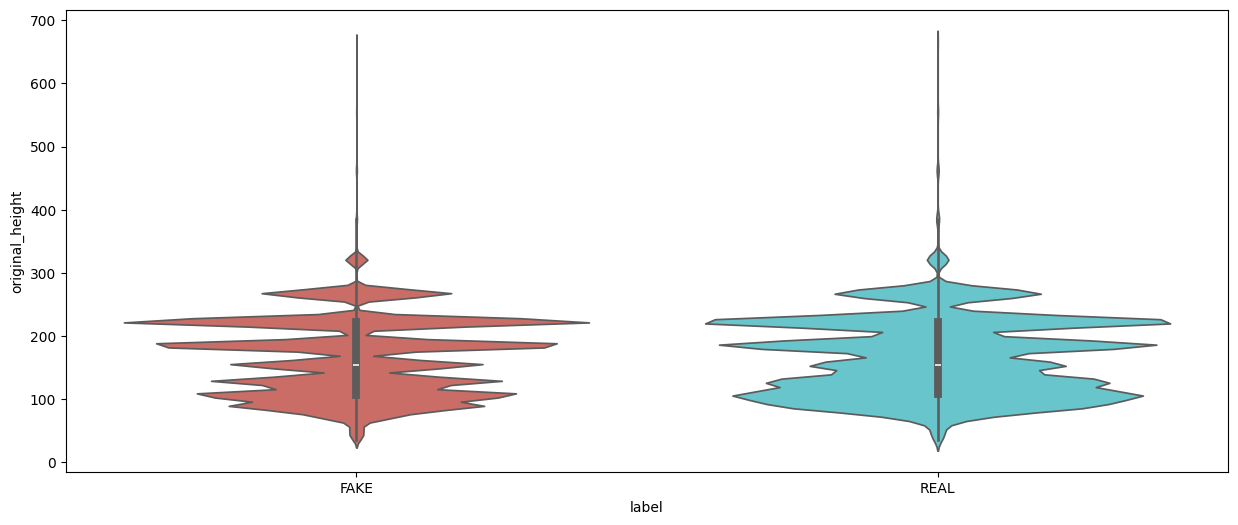

In [29]:
for i in categorical:
    for j in numerical_columns:
        plt.figure(figsize=(15,6))
        sns.violinplot(x = df[i], y = df[j], data = df, palette = 'hls')
        plt.show()

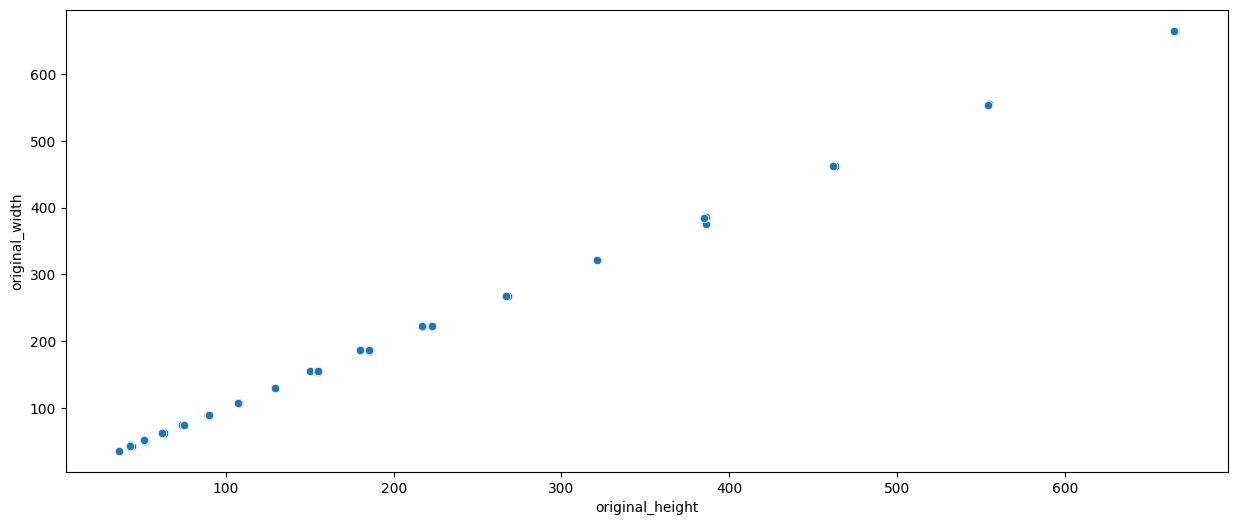

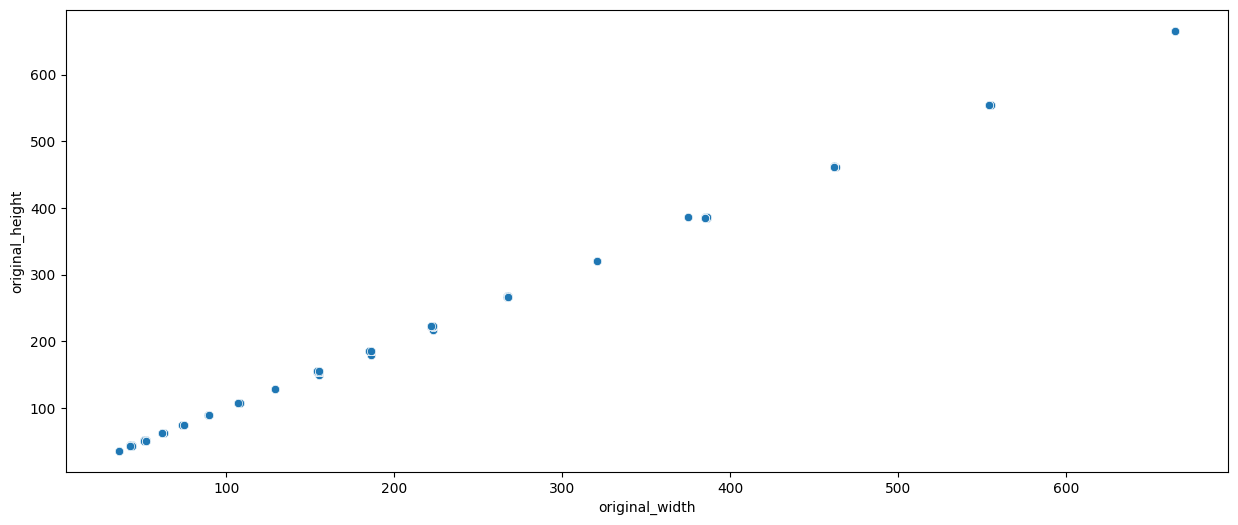

In [30]:
for i in numerical_columns:
    for j in numerical_columns:
        if i != j:
            plt.figure(figsize=(15,6))
            sns.scatterplot(x = df[j], y = df[i], data = df, palette = 'hls')
            plt.show()

In [31]:
real_df = df[df["label"] == "REAL"]
fake_df = df[df["label"] == "FAKE"]
sample_size = 10000

real_df = real_df.sample(sample_size, random_state=42)
fake_df = fake_df.sample(sample_size, random_state=42)

sample_meta = pd.concat([real_df, fake_df])

In [32]:
from sklearn.model_selection import train_test_split

Train_set, Test_set = train_test_split(sample_meta,test_size=0.2,random_state=42,stratify=sample_meta['label'])
Train_set, Val_set  = train_test_split(Train_set,test_size=0.3,random_state=42,stratify=Train_set['label'])

In [33]:
Train_set.shape,Val_set.shape,Test_set.shape

((11200, 5), (4800, 5), (4000, 5))

In [34]:
import cv2

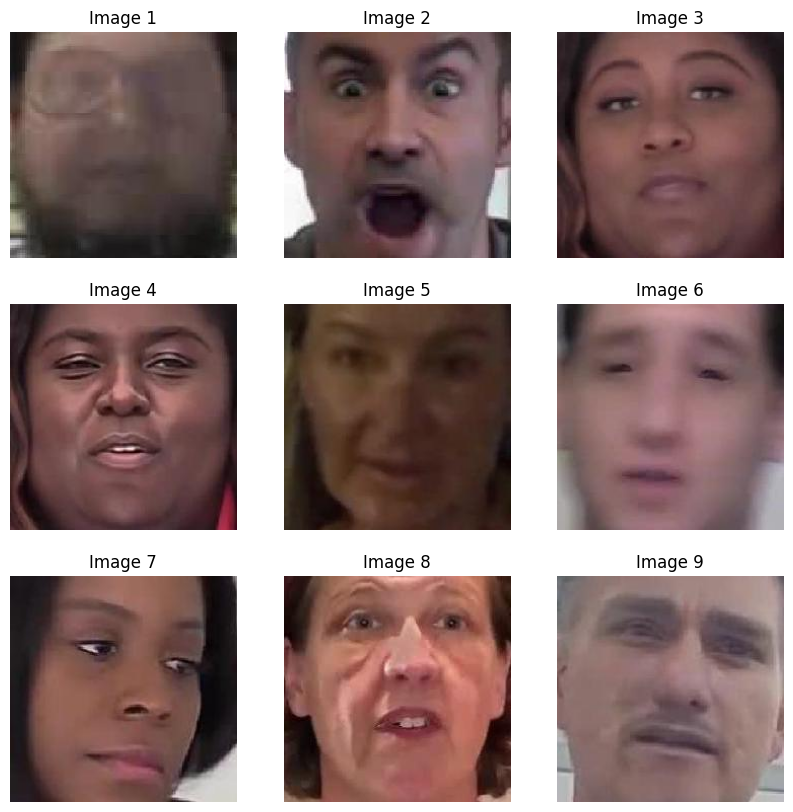

In [35]:
image_path = '/Users/iamprincekumar/Documents/minorproject/deepfake-faces/faces_224/'

image_files = os.listdir(image_path)

image_files.sort()

selected_images = image_files[:9]

plt.figure(figsize=(10, 10))

for index, image_file in enumerate(selected_images):
    image = cv2.imread(os.path.join(image_path, image_file))

    plt.subplot(3, 3, index + 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f'Image {index + 1}')
    plt.axis('off')

plt.show()

In [36]:
for i, image_file in enumerate(image_files[:10]):
    image = cv2.imread(os.path.join(image_path, image_file))
    if image is not None:
        height, width, _ = image.shape
        print(f"Resolution of image {i+1}: {width} x {height}")
    else:
        print(f"Error reading image {i+1}")

if len(image_files) < 10:
    print(f"Only {len(image_files)} images found in the directory.")

Resolution of image 1: 224 x 224
Resolution of image 2: 224 x 224
Resolution of image 3: 224 x 224
Resolution of image 4: 224 x 224
Resolution of image 5: 224 x 224
Resolution of image 6: 224 x 224
Resolution of image 7: 224 x 224
Resolution of image 8: 224 x 224
Resolution of image 9: 224 x 224
Resolution of image 10: 224 x 224


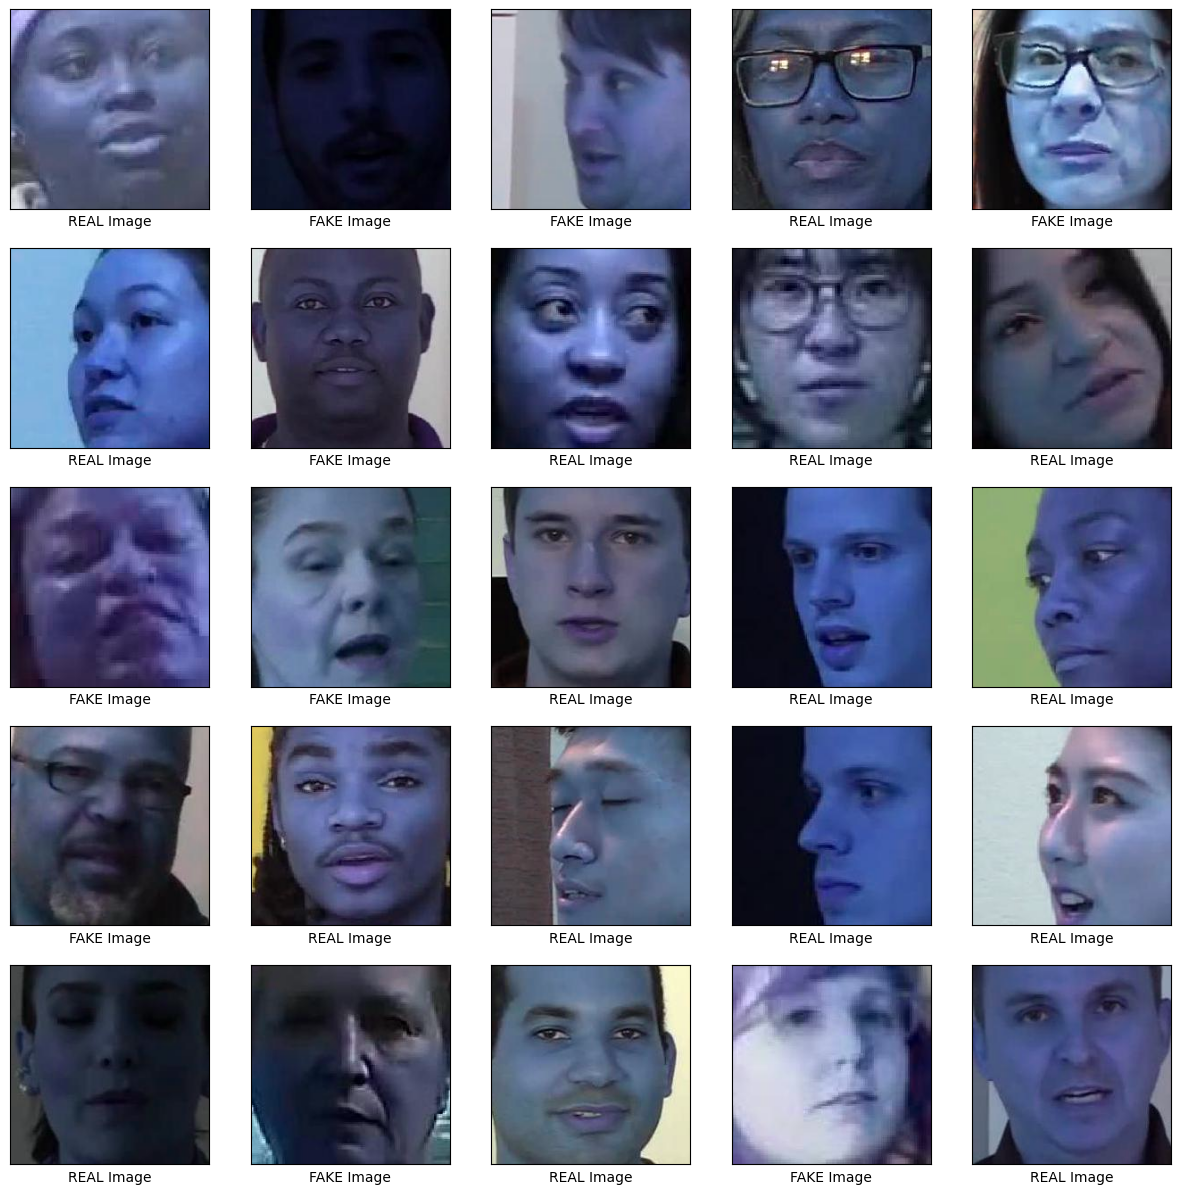

In [37]:
plt.figure(figsize=(15,15))
for cur,i in enumerate(Train_set.index[25:50]):
    plt.subplot(5,5,cur+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    plt.imshow(cv2.imread('/Users/iamprincekumar/Documents/minorproject/deepfake-faces/faces_224/'+Train_set.loc[i,'videoname'][:-4]+'.jpg'))
    
    if(Train_set.loc[i,'label']=='FAKE'):
        plt.xlabel('FAKE Image')
    else:
        plt.xlabel('REAL Image')
        
plt.show()

In [38]:
def retreive_dataset(set_name):
    images,labels=[],[]
    for (img, imclass) in zip(set_name['videoname'], set_name['label']):
        images.append(cv2.imread('/Users/iamprincekumar/Documents/minorproject/deepfake-faces/faces_224/'+img[:-4]+'.jpg'))
        if(imclass=='FAKE'):
            labels.append(1)
        else:
            labels.append(0)
    
    return np.array(images),np.array(labels)

In [39]:
X_train,y_train=retreive_dataset(Train_set)
X_val,y_val=retreive_dataset(Val_set)
X_test,y_test=retreive_dataset(Test_set)

In [40]:
import tensorflow as tf
from tensorflow.keras import layers, models
from functools import partial

In [41]:
tf.random.set_seed(42)

In [42]:
DefaultConv2D = partial(layers.Conv2D, kernel_size=3, padding="same",
                        activation="relu", kernel_initializer="he_normal")

# Model Definition
model = models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[224, 224, 3]),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(units=128, activation="relu",
                 kernel_initializer="he_normal"),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(units=64, activation="relu",
                 kernel_initializer="he_normal"),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(units=1, activation="sigmoid")
])

2024-10-14 11:56:06.680556: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-10-14 11:56:06.680581: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-10-14 11:56:06.680588: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-10-14 11:56:06.680641: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-14 11:56:06.680856: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [43]:
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)

In [44]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss="binary_crossentropy", metrics=["accuracy"])

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      9472      
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 112, 112, 64)      256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 128)       0

In [46]:
history = model.fit(
    X_train, y_train,
    epochs=10,  # Adjust as needed
    batch_size=32,  # Adjust as needed
    validation_data=(X_val, y_val),
    verbose=1
)

Epoch 1/10


2024-10-14 11:56:17.330200: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2024-10-14 11:56:17.388020: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


350/350 [==============================] - 174s 479ms/step - loss: 0.7448 - accuracy: 0.5420 - val_loss: 1.2221 - val_accuracy: 0.5088
Epoch 2/10
350/350 [==============================] - 227s 648ms/step - loss: 0.6894 - accuracy: 0.5740 - val_loss: 1.1010 - val_accuracy: 0.5104
Epoch 3/10
350/350 [==============================] - 174s 497ms/step - loss: 0.6688 - accuracy: 0.6012 - val_loss: 0.6595 - val_accuracy: 0.5981
Epoch 4/10
350/350 [==============================] - 172s 490ms/step - loss: 0.6445 - accuracy: 0.6256 - val_loss: 0.6359 - val_accuracy: 0.6321
Epoch 5/10
350/350 [==============================] - 173s 494ms/step - loss: 0.6324 - accuracy: 0.6400 - val_loss: 0.6236 - val_accuracy: 0.6423
Epoch 6/10
350/350 [==============================] - 172s 490ms/step - loss: 0.6169 - accuracy: 0.6550 - val_loss: 0.6405 - val_accuracy: 0.6183
Epoch 7/10
350/350 [==============================] - 451s 1s/step - loss: 0.5957 - accuracy: 0.6783 - val_loss: 0.8473 - val_accuracy:

In [47]:
y_pred = model.predict(X_test)

125/125 [==============================] - 16s 124ms/step


from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score

In [48]:
y_test_pred_binary = (y_pred > 0.5).astype(int)

In [49]:
y_train_pred = model.predict(X_train)
y_train_pred_binary = (y_train_pred > 0.5).astype(int)

350/350 [==============================] - 44s 125ms/step


In [50]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score

train_accuracy = accuracy_score(y_train, y_train_pred_binary)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

Training Accuracy: 70.79%


In [51]:
test_accuracy = accuracy_score(y_test, y_test_pred_binary)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 65.08%


In [52]:
f1 = f1_score(y_test, y_test_pred_binary)
print(f"F1 Score: {f1:.4f}")

precision = precision_score(y_test, y_test_pred_binary)
print(f"Precison: {precision:.4f}")

recall = recall_score(y_test, y_test_pred_binary)
print(f"Recall: {recall:.4f}")

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, y_test_pred_binary)
print(f"AUC-ROC: {auc_roc:.4f}")

F1 Score: 0.5998
Precison: 0.7022
Recall: 0.5235
AUC-ROC: 0.6507


In [53]:
conf_matrix = confusion_matrix(y_test, y_test_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1556  444]
 [ 953 1047]]


In [54]:
import scikitplot as skplt

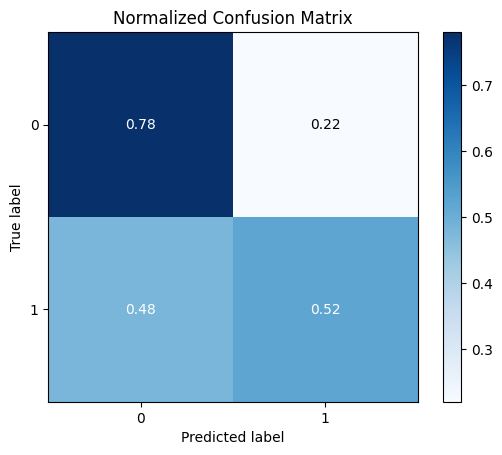

In [55]:
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred_binary, normalize=True)
plt.show()

In [56]:
class_report = classification_report(y_test, y_test_pred_binary)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.78      0.69      2000
           1       0.70      0.52      0.60      2000

    accuracy                           0.65      4000
   macro avg       0.66      0.65      0.65      4000
weighted avg       0.66      0.65      0.65      4000



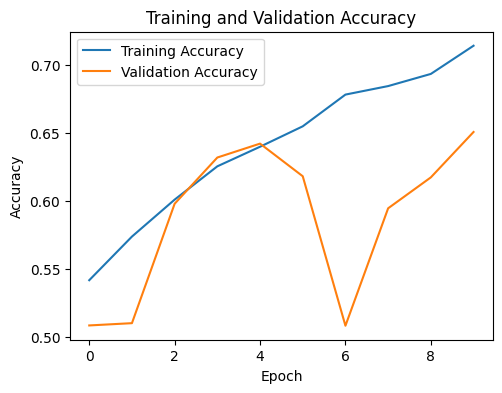

In [57]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

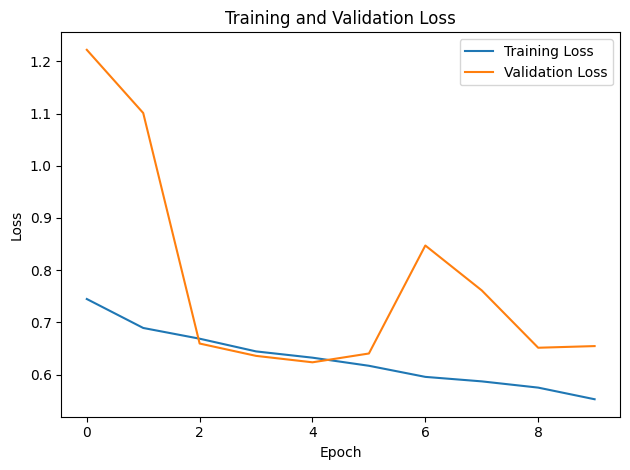

In [58]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [59]:
from tensorflow.keras.applications import ResNet50

In [60]:
input_shape = (224, 224, 3)

In [61]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

In [62]:
for layer in base_model.layers:
    layer.trainable = False

In [63]:
model_resnet50 = models.Sequential()
model_resnet50.add(base_model)
model_resnet50.add(layers.GlobalAveragePooling2D())
model_resnet50.add(layers.Dense(1, activation='sigmoid'))

In [64]:
model_resnet50.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_3 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 23589761 (89.99 MB)
Trainable params: 2049 (8.00 KB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [65]:
from tensorflow.keras import optimizers

In [66]:
model_resnet50.compile(optimizer=optimizers.Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [67]:
history = model_resnet50.fit(
    X_train, y_train,
    epochs=10,  
    validation_data=(X_val, y_val),
    verbose=1
)

Epoch 1/10


2024-10-14 12:34:26.376929: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.
2024-10-14 12:34:26.423894: W tensorflow/core/common_runtime/optimize_function_graph_utils.cc:615] Ignoring multi-device function optimization failure: INVALID_ARGUMENT: Input 3 of node Adam/AssignSubVariableOp_1 was passed resource from sequential_1_resnet50_conv3_block1_0_bn_fusedbatchnormv3_readvariableop_resource:0 incompatible with expected float.


350/350 [==============================] - 128s 354ms/step - loss: 0.6544 - accuracy: 0.6120 - val_loss: 0.6149 - val_accuracy: 0.6610
Epoch 2/10
350/350 [==============================] - 129s 370ms/step - loss: 0.6039 - accuracy: 0.6741 - val_loss: 0.6013 - val_accuracy: 0.6719
Epoch 3/10
350/350 [==============================] - 131s 374ms/step - loss: 0.5844 - accuracy: 0.6877 - val_loss: 0.6032 - val_accuracy: 0.6712
Epoch 4/10
350/350 [==============================] - 128s 366ms/step - loss: 0.5688 - accuracy: 0.7040 - val_loss: 0.5855 - val_accuracy: 0.6883
Epoch 5/10
350/350 [==============================] - 128s 367ms/step - loss: 0.5553 - accuracy: 0.7154 - val_loss: 0.5939 - val_accuracy: 0.6808
Epoch 6/10
350/350 [==============================] - 127s 363ms/step - loss: 0.5507 - accuracy: 0.7179 - val_loss: 0.5811 - val_accuracy: 0.6938
Epoch 7/10
350/350 [==============================] - 130s 372ms/step - loss: 0.5413 - accuracy: 0.7237 - val_loss: 0.6123 - val_accura

In [68]:
y_pred = model_resnet50.predict(X_test)

125/125 [==============================] - 30s 234ms/step


In [69]:
y_test_pred_binary = (y_pred > 0.5).astype(int)

In [70]:
y_train_pred = model_resnet50.predict(X_train)
y_train_pred_binary = (y_train_pred > 0.5).astype(int)

350/350 [==============================] - 83s 236ms/step


In [71]:
train_accuracy = accuracy_score(y_train, y_train_pred_binary)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

Training Accuracy: 75.52%


In [72]:
test_accuracy = accuracy_score(y_test, y_test_pred_binary)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 71.15%


In [73]:
f1 = f1_score(y_test, y_test_pred_binary)
print(f"F1 Score: {f1:.4f}")

precision = precision_score(y_test, y_test_pred_binary)
print(f"Precison: {precision:.4f}")

recall = recall_score(y_test, y_test_pred_binary)
print(f"Recall: {recall:.4f}")

F1 Score: 0.7131
Precison: 0.7092
Recall: 0.7170


In [74]:
conf_matrix = confusion_matrix(y_test, y_test_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1412  588]
 [ 566 1434]]


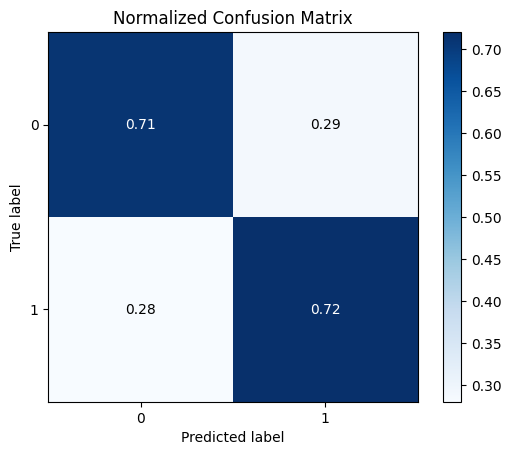

In [75]:
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred_binary, normalize=True)
plt.show()

In [76]:
class_report = classification_report(y_test, y_test_pred_binary)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      2000
           1       0.71      0.72      0.71      2000

    accuracy                           0.71      4000
   macro avg       0.71      0.71      0.71      4000
weighted avg       0.71      0.71      0.71      4000



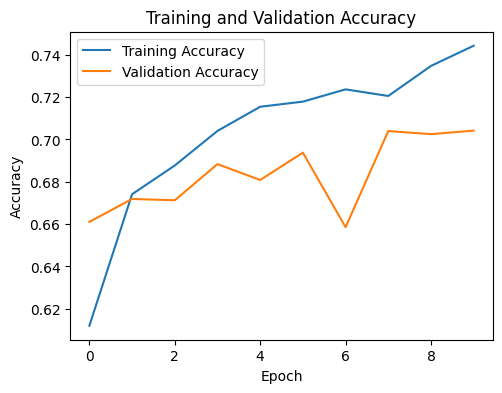

In [77]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

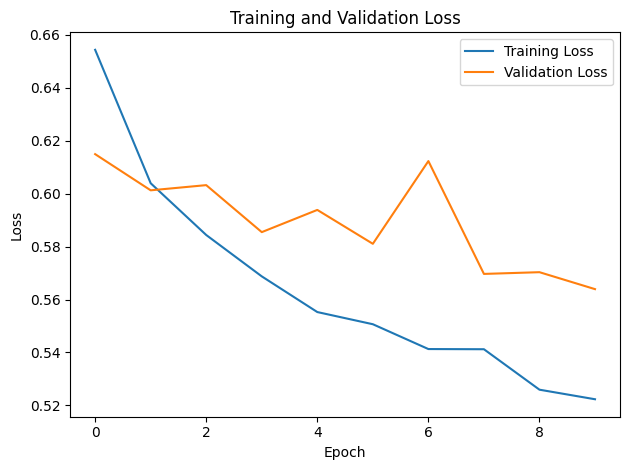

In [78]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()